In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics



In [2]:
dataset = pd.read_csv("headbrain.csv")

In [3]:
dataset

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590
5,1,1,3585,1300
6,1,1,3785,1400
7,1,1,3559,1255
8,1,1,3613,1355
9,1,1,3982,1375


In [4]:
print(dataset.shape)
dataset.head()

(237, 4)


,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [17]:
#dividing the data into training and testing data
x = dataset["Head Size(cm^3)"].values
y = dataset["Brain Weight(grams)"].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =  0.2,random_state = 1)

#calculating the mean
x_mean = np.mean(x_train)
y_mean = np.mean(y_train)


In [6]:
#calculating the co-efficients
num = np.sum((x_train - x_mean) * (y_train - y_mean))  #( A X B)
den = np.sum((x_train - x_mean) ** 2 ) #(A ^ 2)

b1 = num / den
b0 = y_mean - b1 * x_mean

print("The values of b1 and b0 are:", b1,b0)
           


The values of b1 and b0 are: 0.2721200845072739 291.16692877116407


In [7]:
x_max = np.max(x_train) + 100
x_min = np.min(x_train) - 100


In [8]:
#plotting 
x_tr = np.linspace(x_min, x_max, 1000)
y_tr = b0 + b1 * x_tr

Training data:


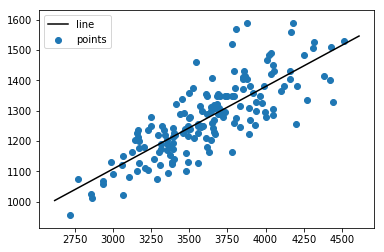

In [9]:
print('Training data:')
plt.plot(x_tr,y_tr,label = "line",color = "black")
plt.scatter(x_train,y_train,label = "points")
plt.legend()

In [10]:
x_max = np.max(x_test) + 100
x_min = np.min(x_test) - 100


In [11]:
#plotting 
x_ts = np.linspace(x_min, x_max, 1000)
y_ts = b0 + b1 * x_ts

Testing data:


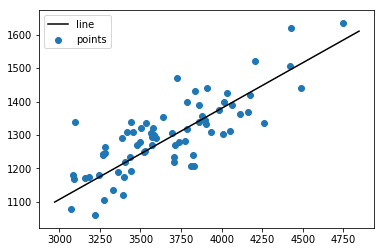

In [12]:
print('Testing data:')
plt.plot(x_ts,y_ts,label = "line",color = "black")
plt.scatter(x_test,y_test,label = "points")
plt.legend()

In [13]:
#calculting the errors
def calc(x_org, y_org):
    y_pred = b0 + b1 * x_org
    n = len(x_org)
    rmse = np.sqrt((np.sum(y_org - y_pred) ** 2) / n)
    rss = np.sum((y_org - y_pred) ** 2)
    tss = np.sum((y_org - np.mean(y_org)) ** 2)
    rs = 1 - (rss / tss)
    return rmse,rs

In [14]:
train_rmse, train_r2 = calc(x_train, y_train)
test_rmse, test_r2 = calc(x_test, y_test)

In [19]:
print(f"Training Set\nRMSE = {train_rmse}\nR2 = {train_r2}")
print(f"Testing Set\nRMSE = {test_rmse}\nR2 = {test_r2}")
plt.show()

Training Set
RMSE = 1.3275762469701072e-12
R2 = 0.6406777992910951
Testing Set
RMSE = 78.88746988045907
R2 = 0.617992531486377
